# 在线教育数据分析

In [1]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

# pio.renderers.default = 'notebook'

from pyecharts.charts import Sankey, Calendar, Radar
from pyecharts import options as opts
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False


In [ ]:
# 验证plotly能否正常运行
import plotly.express as px

# 生成测试数据
course_links = px.data.iris()
fig = px.scatter(course_links, x="sepal_width", y="sepal_length", color="species")
fig.show()

In [116]:
# 检测pycharts是否运行正常
from pyecharts.charts import Bar
from pyecharts.globals import CurrentConfig, NotebookType

CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK

bar = (
    Bar()
    .add_xaxis(["A", "B", "C"])
    .add_yaxis("值", [1, 2, 3])
    .set_global_opts(title_opts=opts.TitleOpts(title="测试图表"))
)
bar.render_notebook()

In [3]:
DATA_DIR = "../.data/w1"

## 数据检视和预处理

In [4]:
# 读数据，初步检视
course_chapter = pd.read_csv(os.path.join(DATA_DIR, 'course_chapter.csv'))
course_task = pd.read_csv(os.path.join(DATA_DIR, 'course_task.csv'))
course_chapter.sort_values('id').head()

id  courseId     type  number  seq   title  createdTime  updatedTime  \
0  13         3   lesson       2    4      引言   1536659838   1560909864   
1  14         3  chapter       1    3  机器学习绪论   1536659876   1560909861   
2  15         3   lesson       3    6    基本术语   1536660148   1560909864   
3  16         3   lesson       4    8    假设空间   1536660148   1560909864   
4  17         3   lesson       5   10    归纳偏好   1536660148   1560909864   

   copyId     status  isOptional  migrateLessonId  migrateCopyCourseId  \
0       0  published           0                0                    0   
1       0  published           0                0                    0   
2       0  published           0                0                    0   
3       0  published           0                0                    0   
4       0  published           0                0                    0   

   migrateRefTaskId  mgrateCopyTaskId  migrate_task_id  published_number  
0                 0                 0                0                 2  
1                 0                 0                0                 0  
2                 0                 0                0                 3  
3                 0                 0                0                 4  
4                 0                 0                0                 5

id从13开始

In [5]:
course_task.sort_values('id').head()

id  courseId  fromCourseSetId  seq  categoryId  activityId     title  \
0  11         3                3    5          13          11        引言   
1  12         3                3    7          15          12      基本术语   
2  13         3                3    9          16          13      假设空间   
3  14         3                3   11          17          14      归纳偏好   
4  17         3                3   16          21          17  经验误差与过拟合   

   isFree  isOptional  startTime  ...  updatedTime    mode  isLesson  number  \
0       0           0          0  ...   1620982123  lesson         1       2   
1       0           0          0  ...   1620982123  lesson         1       3   
2       0           0          0  ...   1560909861  lesson         1       4   
3       0           0          0  ...   1560909861  lesson         1       5   
4       0           0          0  ...   1560909861  lesson         1       7   

    type mediaSource  length maxOnlineNum copyId migrateLessonId  
0  video        self     564            0      0               0  
1  video        self     562            0      0               0  
2  video        self     361            0      0               0  
3  video        self     171            0      0               0  
4  video        self     447            0      0               0  

[5 rows x 24 columns]

id从11开始

In [140]:
classroom_member = pd.read_csv(os.path.join(DATA_DIR, 'classroom_member.csv'))
classroom_courses = pd.read_csv(os.path.join(DATA_DIR, 'classroom_courses.csv'))

In [7]:
classroom_member.sort_values('id').head()

id  classroomId  userId  orderId  levelId  noteNum  threadNum  locked  \
0   1            1       3        0        0        0          0       0   
1   2            1     975        0        0        0          0       0   
2   3            1      14        0        0        0          0       0   
3   4            1      23        0        0        0          0       0   
4   5            1      15        0        0        0          0       0   

                    role  createdTime  lastLearnTime  learnedNum  updatedTime  \
0  |teacher|headTeacher|   1543213508            NaN         NaN   1620269259   
1              |teacher|   1543213559            NaN         NaN   1543213559   
2              |teacher|   1544524377            NaN         NaN   1544524377   
3              |teacher|   1544524377            NaN         NaN   1544524377   
4              |teacher|   1544524377            NaN         NaN   1544524377   

   deadline  refundDeadline  deadlineNotified  
0         0               0                 0  
1         0               0                 0  
2         0               0                 0  
3         0               0                 0  
4         0               0                 0

In [141]:
classroom_courses.sort_values('id').head()

id  classroomId  courseId  parentCourseId  seq  disabled  courseSetId
0   2            1        43              41    3         0           40
1   3            1        51               5   13         0           47
2   4            1        52               6   18         0           48
3   5            1        53               8   12         0           49
4   6            1        54               9   14         0           50

In [9]:
user_learn_statistics_total = pd.read_csv(os.path.join(DATA_DIR, 'user_learn_statistics_total.csv'))
activity_learn_log = pd.read_csv(os.path.join(DATA_DIR, 'activity_learn_log.csv'))
log = pd.read_csv(os.path.join(DATA_DIR, 'log.csv'))

In [51]:
# learnedSeconds数值太大，转换成h
user_learn_statistics_total['learnedHours'] = user_learn_statistics_total['learnedSeconds'] / 3600
user_learn_statistics_total.sort_values('id').head()

id  userId  joinedClassroomNum  joinedCourseSetNum  joinedCourseNum  \
0   1       1                   0                   0                0   
1   2       3                   2                   0               15   
2   3       4                   4                   0               61   
3   4       7                   3                   0               51   
4   5       5                  28                   0               38   

   exitClassroomNum  exitCourseSetNum  exitCourseNum  learnedSeconds  \
0                 0                 0              0               0   
1                 1                 0              3           23373   
2                 0                 0              1           23492   
3                 0                 0              3          291483   
4                10                 0             14          487216   

   finishedTaskNum  createdTime  updatedTime  learnedHours  
0                0   1516726801   1516726801      0.000000  
1                5   1541098801   1687719604      6.492500  
2               12   1541098801   1682276405      6.525556  
3              103   1541185201   1682276405     80.967500  
4              176   1541444401   1687892406    135.337778

In [108]:
print(user_learn_statistics_total['userId'].nunique())
print(user_learn_statistics_total['id'].nunique())

142251
142251


userId
174590    1
1         1
3         1
4         1
7         1
         ..
25        1
30        1
27        1
28        1
29        1
Name: count, Length: 142251, dtype: int64

发现id数和用户数一致，这应该是一个统计表，统计了用户的行为数据，会及时更新但不会增加记录（除非有新的用户注册）。这应该基于activity等表统计，看到Time都是Unix时间戳，我们初步判断learnedSeconds可能可以通过其他表计算得出，尝试计算来进行交叉验证。

In [114]:
activity_learn_log[['id', 'userId',  'learnedTime', 'event']].groupby(['userId', 'event'], as_index=False).count()

userId     event   id  learnedTime
0           3     doing    3            3
1           3     start    4            4
2           5     doing  178          178
3           5    finish    3            3
4           5     start    7            7
...       ...       ...  ...          ...
36265  174600     doing    1            1
36266  174600     start    1            1
36267  174601     doing    2            2
36268  174601     start    2            2
36269  174601  watching    1            1

[36270 rows x 4 columns]

用户的start行为和finish行为难以匹配，可能有的用户学习完直接关闭了网页，导致没有记录finish行为。这也让我们难以将total表和activity_log表进行关联校验。

In [11]:
log.sort_values('id').head()

id  userId                     module          action  \
0   1  142708                       user   login_success   
1   2  142708  reward_point_account_flow          inflow   
2   3   57937                       user   login_success   
3   4   57937  reward_point_account_flow          inflow   
4   5    9464                  classroom  join_classroom   

                                                data                browser  \
0                                                NaN  Chrome(92.0.4515.131)   
1  {"userId":"142708","type":"inflow","amount":"5...  Chrome(92.0.4515.131)   
2                                                NaN      Chrome(101.0.0.0)   
3  {"userId":"57937","type":"inflow","amount":"5"...      Chrome(101.0.0.0)   
4  {"userId":"143247","classroomId":"919","title"...  Chrome(86.0.4240.198)   

  operatingSystem    device  createdTime level  
0      Windows NT  computer   1673232415  info  
1      Windows NT  computer   1673232416  info  
2      Windows NT  computer   1673232434  info  
3      Windows NT  computer   1673232435  info  
4      Windows 98  computer   1673232466  info

In [12]:
activity_learn_log.sort_values('id').head()

id  activityId  courseTaskId  userId  mediaType  event  \
0   1      255355        255341  161109  testpaper  start   
1   2      256595        256575  161556      video  doing   
2   3      263272        263255  162609      video  doing   
3   4      255303        255285  162713      video  doing   
4   5      253273        253258  162685      video  doing   

                                                data  learnedTime  createdTime  
0                {"taskId":"255341","event":"start"}            0   1679989498  
1  {"lastTime":"1679989438","lastLearnTime":"583....           60   1679989498  
2  {"lastTime":"1679989451","lastLearnTime":"505....           48   1679989499  
3  {"lastTime":"1679989440","lastLearnTime":"331....           59   1679989499  
4  {"lastTime":"1679989486","lastLearnTime":"289....           13   1679989499

In [13]:
testpaper = pd.read_csv(os.path.join(DATA_DIR, 'testpaper.csv'))
# 此文件utf8读取报错，改为gbk读取
# 分块读取时数据类型判断错误，改为low_memory=False
testpaper_result = pd.read_csv(os.path.join(DATA_DIR, 'testpaper_result.csv'), encoding='gbk', low_memory=False)

In [14]:
testpaper.sort_values('id').head()

id                name  courseId  lessonId   limitedTime pattern target  \
0  16  瀹炶瀹濋偖瀵勪俊鎭～鍐?,50"         0         0  questionType     NaN   open   
1  17  瀹炶瀹濋偖瀵勪俊鎭～鍐?,55"         0         0  questionType     NaN   open   
2  18  瀹炶瀹濋偖瀵勪俊鎭～鍐?,92"         0         0  questionType     NaN   open   
3  19  瀹炶瀹濋偖瀵勪俊鎭～鍐?,93"         0         0  questionType     NaN   open   
4  20  瀹炶瀹濋偖瀵勪俊鎭～鍐?,94"         0         0  questionType     NaN   open   

  status              score passedCondition itemCount questionTypeSeq  \
0      0  {"type":"submit"}               3       NaN      1545128560   
1      0  {"type":"submit"}               3       NaN      1545128581   
2      0  {"type":"submit"}               3       NaN      1545128581   
3      0  {"type":"submit"}               3       NaN      1545128581   
4      0  {"type":"submit"}               3       NaN      1545128581   

   createdTime                                        updatedTime     metas  \
0   1572282002  {"totalScores":{"single_choice":0,"choice":0,"...  homework   
1   1572282002  {"totalScores":{"single_choice":0,"choice":0,"...  homework   
2   1572282002  {"totalScores":{"single_choice":0,"choice":0,"...  homework   
3   1572282002  {"totalScores":{"single_choice":0,"choice":0,"...  homework   
4   1572282002  {"totalScores":{"single_choice":0,"choice":0,"...  homework   

  type  courseSetId  
0   46          NaN  
1   51          NaN  
2   88          NaN  
3   89          NaN  
4   90          NaN

id从16开始
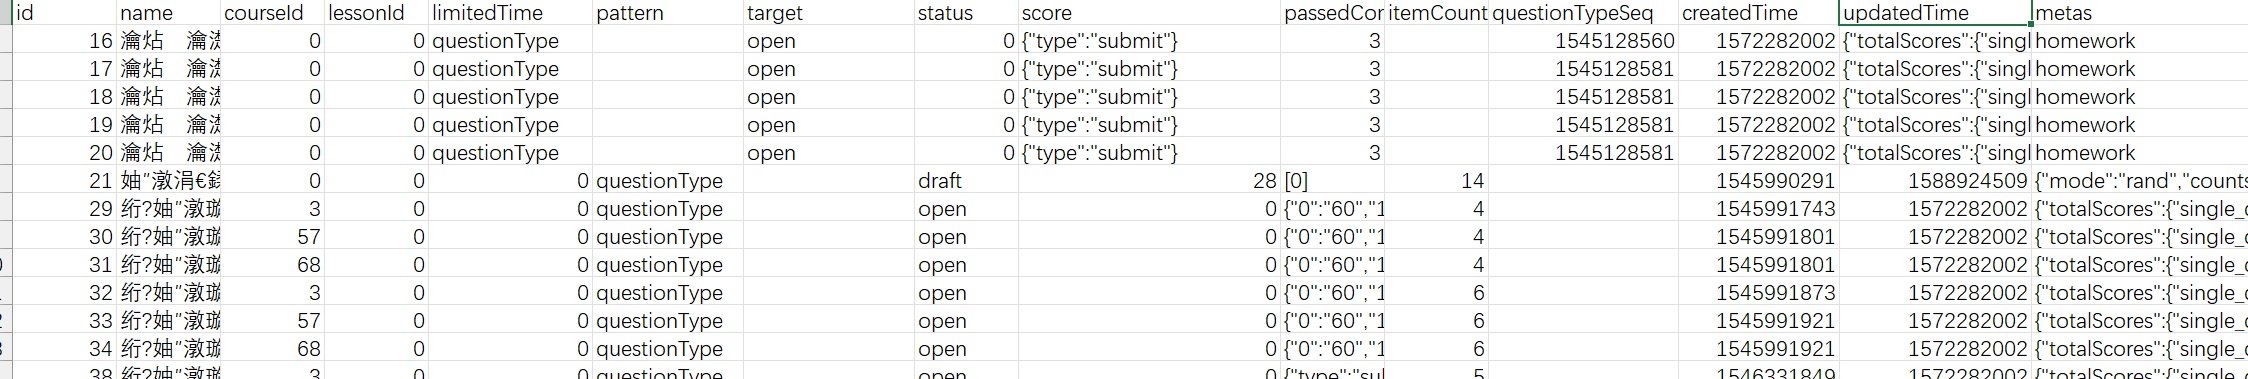
可以看到，数据源存在部分记录字段偏移的情况，但似乎pandas自动处理了这一情况，可能基于大部分正常字段的长度，自动识别出偏移的字段。所以暂不做处理。

In [15]:
testpaper_result.sort_values('id').head()

id paperName  testId  userId  courseId  lessonId  score  objectiveScore  \
0   1       作业1       2       3         2       467    0.0             0.0   
1   2       作业1       2       3         2       467    0.0             0.0   
2   3       作业1       2       3         2       467    0.0             0.0   
3   4       作业1       2     719         2       467    0.0             0.0   
4   5       试卷2       4       3         2       685    2.0             2.0   

   subjectiveScore teacherSay  ...  limitedTime   beginTime     endTime  \
0              0.0        NaN  ...            0  1539336820  1539336839   
1              0.0        NaN  ...            0  1539336848  1539336856   
2              0.0        NaN  ...            0  1539336864           0   
3              0.0        NaN  ...            0  1541166545  1541166573   
4              0.0        NaN  ...            0  1541497782  1541497796   

   updateTime    status  checkTeacherId checkedTime  usedTime       type  \
0  1539336839  finished               0           0        18   homework   
1  1539336856  finished               0           0         7   homework   
2           0     doing               0           0         0   homework   
3  1541166573  finished               0           0        27   homework   
4  1541497796  finished               0  1541497796        13  testpaper   

   courseSetId  
0            2  
1            2  
2            2  
3            2  
4            2  

[5 rows x 22 columns]

In [126]:
testpaper_result.groupby('userId').count()

id  paperName  testId  courseId  lessonId  score  objectiveScore  \
userId                                                                      
3       124        124     124       124       124    124             124   
4        11         11      11        11        11     11              11   
5        42         42      42        42        42     42              42   
7         1          1       1         1         1      1               1   
9         1          1       1         1         1      1               1   
...     ...        ...     ...       ...       ...    ...             ...   
174581    1          1       1         1         1      1               1   
174582    1          1       1         1         1      1               1   
174583    1          1       1         1         1      1               1   
174584    1          1       1         1         1      1               1   
174585    1          1       1         1         1      1               1   

        subjectiveScore  teacherSay  rightItemCount  ...  limitedTime  \
userId                                               ...                
3                   124           4             124  ...          124   
4                    11           0              11  ...           11   
5                    42           1              42  ...           42   
7                     1           0               1  ...            1   
9                     1           0               1  ...            1   
...                 ...         ...             ...  ...          ...   
174581                1           0               1  ...            1   
174582                1           0               1  ...            1   
174583                1           0               1  ...            1   
174584                1           0               1  ...            1   
174585                1           0               1  ...            1   

        beginTime  endTime  updateTime  status  checkTeacherId  checkedTime  \
userId                                                                        
3             124      124         124     124             124          124   
4              11       11          11      11              11           11   
5              42       42          42      42              42           42   
7               1        1           1       1               1            1   
9               1        1           1       1               1            1   
...           ...      ...         ...     ...             ...          ...   
174581          1        1           1       1               1            1   
174582          1        1           1       1               1            1   
174583          1        1           1       1               1            1   
174584          1        1           1       1               1            1   
174585          1        1           1       1               1            1   

        usedTime  type  courseSetId  
userId                               
3            124   124          124  
4             11    11           11  
5             42    42           42  
7              1     1            1  
9              1     1            1  
...          ...   ...          ...  
174581         1     1            1  
174582         1     1            1  
174583         1     1            1  
174584         1     1            1  
174585         1     1            1  

[35636 rows x 21 columns]

In [127]:
print(testpaper_result['teacherSay'].count())
testpaper_result['teacherSay'].value_counts()

2070


teacherSay
继续努力，继续进步！                    935
你真棒！我为你骄傲！                    177
用心、专注、坚持，你能做的更好的！             126
不错，有进步，再努力些就会更棒！              106
有点松懈了吧？继续加油吧！                  61
                             ... 
请修改用户名，无法知道名字，是没有成绩的。           1
day1与day2的作业要求是不一样的。            1
请修改用户名！！！                       1
import numpy as np 不需要多次导包      1
方差呢                             1
Name: count, Length: 378, dtype: int64

不知道为什么，从三个表的id来看缺少了前十几条记录。缺失量比较少，忽略不计

In [16]:
# 数据清洗
# 建一个list，储存所有表的名字，名字就是.data文件夹下的文件名

dataframes = [i[:-4] for i in os.listdir(DATA_DIR) if i[-4:] == ".csv"]
dataframes

['activity_learn_log',
 'classroom_courses',
 'classroom_member',
 'course_chapter',
 'course_task',
 'log',
 'testpaper',
 'testpaper_result',
 'user_learn_statistics_total']

In [17]:
def inspect_and_visualize_tables(dataframes):
    """
    检视并可视化给定数据框列表中的缺失值和重复值。

    参数:
    dataframes (dict): 一个字典，键为数据框名称，值为数据框对象。
    """
     # 计算总行数以确定图形大小
    num_tables = len(dataframes)
    fig, axes = plt.subplots(num_tables, 1, figsize=(10, num_tables * 3))

    if num_tables == 1:
        axes = [axes]  # 如果只有一个表，将axes转换为数组以便统一处理

    for i,name in enumerate(dataframes):
        try:
            df = eval(name)
            print(f"检查表: {name}\n")
        except NameError:
            print("No table named", name)
            print("")
            continue

        # 计算缺失值和重复值的占比
        # 重复值以id统计
        missing_values = df.isnull().sum() / len(df) * 100
        duplicate_values = df['id'].duplicated().sum() / len(df) * 100 if len(df) > 0 else 0

        # 创建条形图
        ax = axes[i]
        missing_values.plot(kind='bar', ax=ax, color='skyblue', alpha=0.7, label='缺失值')
        ax.bar(missing_values.index, duplicate_values, bottom=missing_values, color='salmon', alpha=0.7, edgecolor='black', label='重复值')

        # 设置图形属性
        ax.set_title(f'{name} 缺失值和重复值占比')
        # ax.set_xlabel('字段')
        ax.set_ylabel('占比 (%)')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.yaxis.grid(True)
        ax.set_ylim(0, 100)
        ax.legend()

        # 打印缺失值情况
        print(f"缺失值情况:\n{missing_values[missing_values > 0]}\n")
        print(f"重复值行数: {duplicate_values}\n")
        print("-"*50)

    plt.tight_layout()
    plt.show()

检查表: activity_learn_log

缺失值情况:
Series([], dtype: float64)

重复值行数: 0.0

--------------------------------------------------
检查表: classroom_courses

缺失值情况:
Series([], dtype: float64)

重复值行数: 0.0

--------------------------------------------------
检查表: classroom_member

缺失值情况:
lastLearnTime    44.17063
learnedNum       44.17063
dtype: float64

重复值行数: 0.0

--------------------------------------------------
检查表: course_chapter

缺失值情况:
title    0.002519
dtype: float64

重复值行数: 0.0

--------------------------------------------------
检查表: course_task

缺失值情况:
mode           30.673744
number          8.355642
mediaSource    13.508822
dtype: float64

重复值行数: 0.0

--------------------------------------------------
检查表: log

缺失值情况:
data    86.536175
dtype: float64

重复值行数: 0.0

--------------------------------------------------
检查表: testpaper

缺失值情况:
pattern            41.188022
target             50.327279
itemCount          45.262641
questionTypeSeq    51.276387
updatedTime        36.663394
metas   

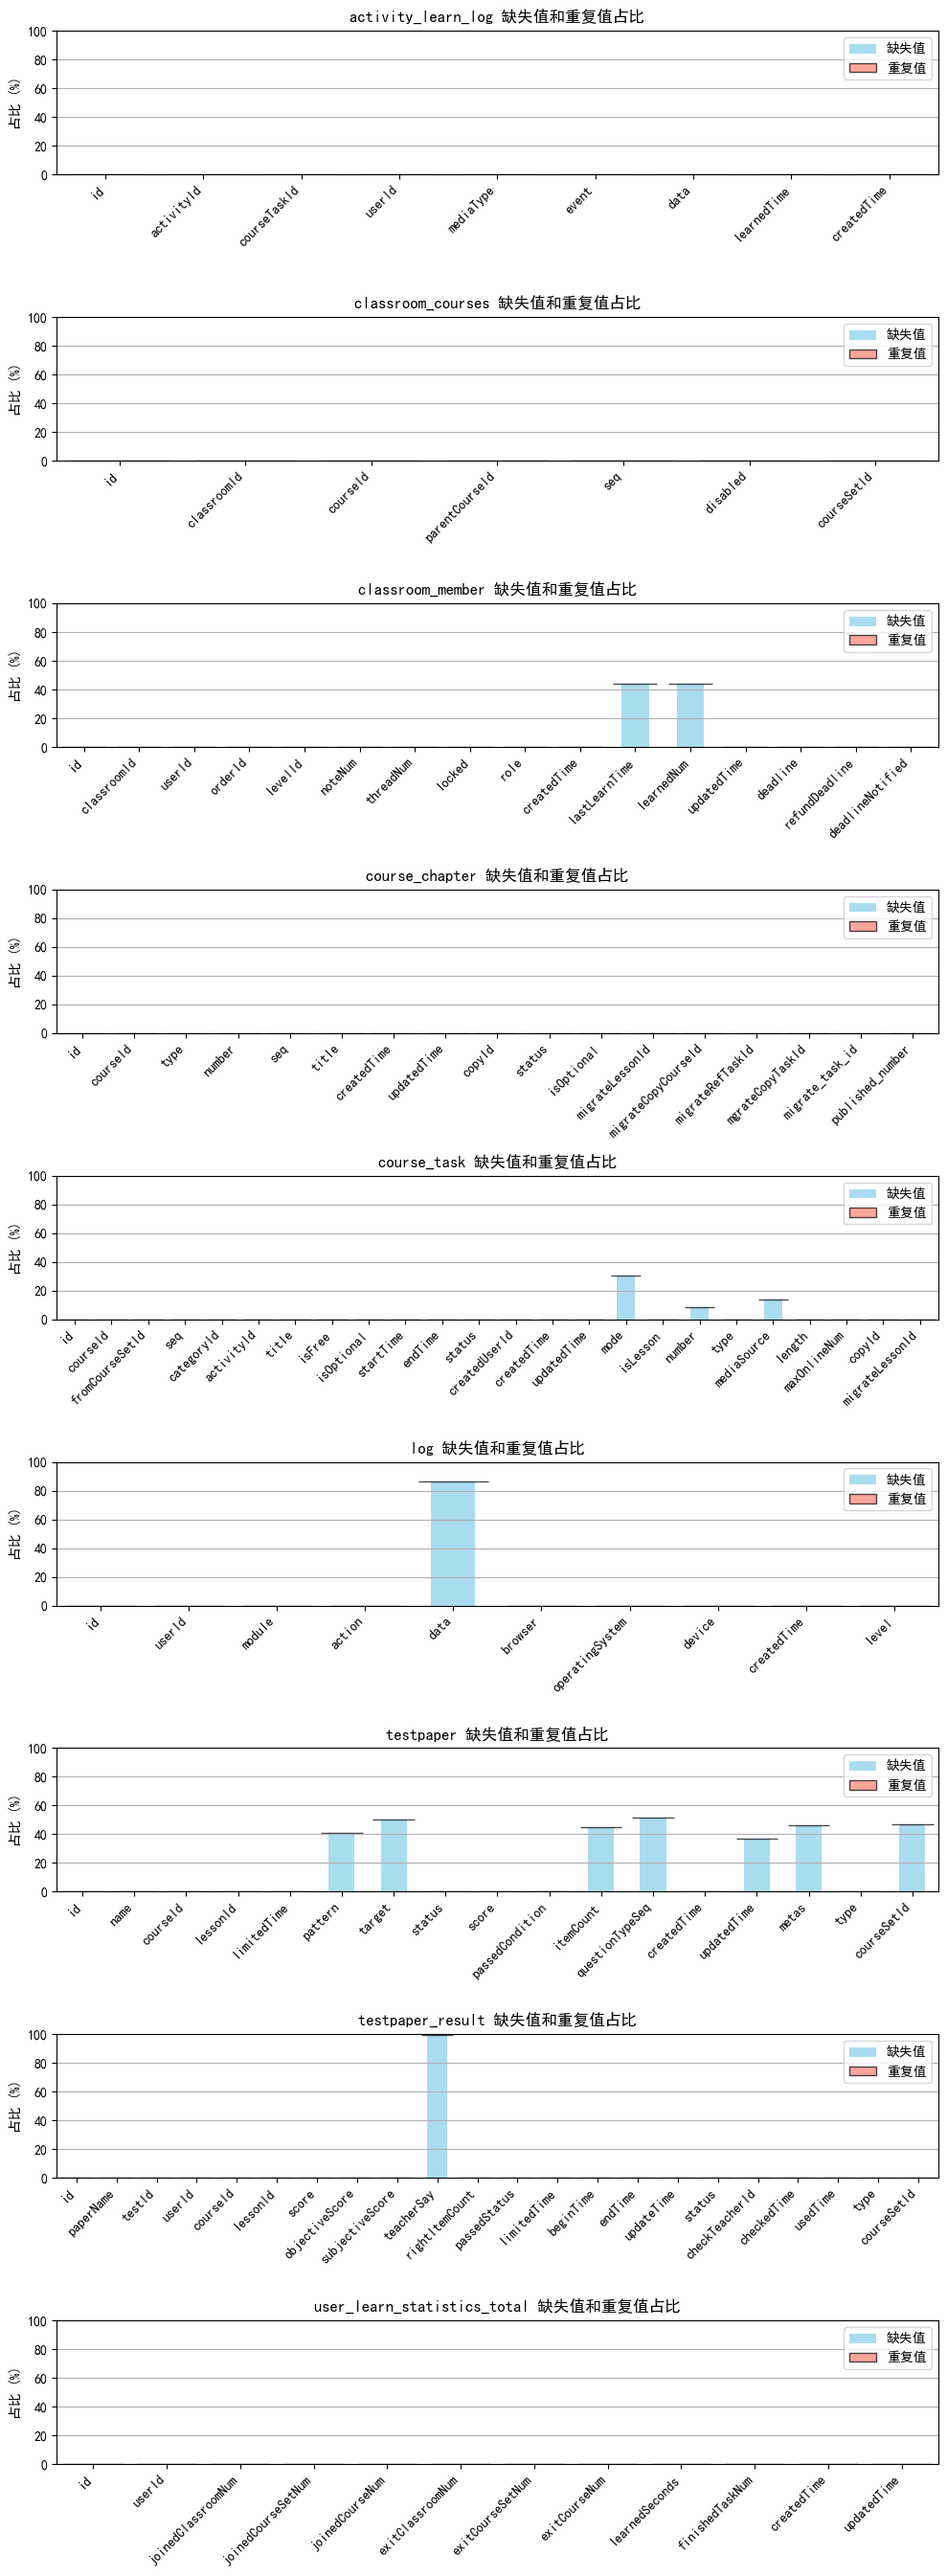

In [18]:
if __name__ == "__main__":

    inspect_and_visualize_tables(dataframes)

classroom_member中缺失上次学习时间 lastLearnTime 和已学时长 learnedNum ，但都允许为空  
这类缺失我们就按下不表，不影响分析结果  
course_chapter中缺失章节名称 title ，但为空正常，填入空字符串即可  
test_paper中考试目标 target 、题型 questionTypeSeq/metas 有较多缺失，达到了近90%，但可以理解空缺的原因，因为题型就在试卷本身，考试目标也一般教师通过口头通知即可（少部分记录有，一般是course-xxx）。这部分数据我们不做分析即可（也无法分析，缺失太多）。  
log中data大量缺失，可能因为不涉及数据更新的操作没有返回值，查看后发现确实如此


## 提出问题
一些直白但抽象的问题：  
哪些学生学习效果好？  
哪些课是好课？  
任务布置是否合理？

## 可视化与分析
    1. 学生学习效果好：可视化学生的成绩，通过直方图、饼图等方式呈现学生的学习情况。
    2. 哪些课是好课：可视化学生的学习情况，通过热力图、散点图等方式呈现学生的学习情况。
    3. 任务布置是否合理：可视化学生的学习情况，通过条形图、折线图等方式呈现学生的学习情况。


1. 章节结构分析  
1.1 章节类型分布（树状图）


In [19]:
type_counts = course_chapter['type'].value_counts()
fig = px.treemap(
    names=type_counts.index,
    parents=['总章节']*len(type_counts),
    values=type_counts.values,
    title='课程章节类型分布（Chapter/Unit/Lesson）'
)
fig.show()


1.2 章节状态与类型关系（堆叠柱状图）


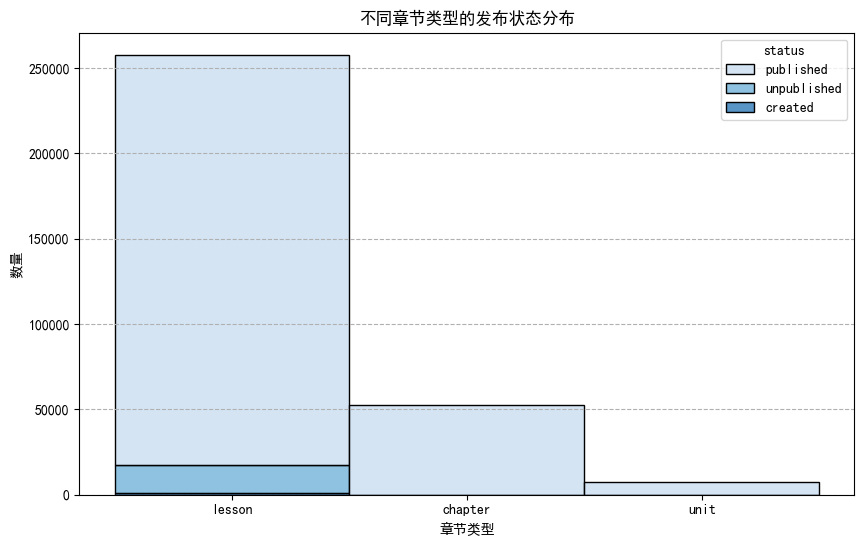

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=course_chapter,
    x='type',
    hue='status',
    multiple='stack',
    palette='Blues'
)
plt.title('不同章节类型的发布状态分布')
plt.xlabel('章节类型')
plt.ylabel('数量')
plt.grid(axis='y', linestyle='--')
plt.show()

2. 用户参与度  
2.1 平行坐标图（Plotly）

In [60]:
fig = px.parallel_coordinates(
    user_learn_statistics_total.sample(1000),  # 抽样防止性能问题
    dimensions=['joinedClassroomNum', 'learnedHours', 'finishedTaskNum'],
    color='joinedClassroomNum',
    labels={'joinedClassroomNum':'加入班级数', 'learnedHours':'学习时长(小时)', 'finishedTaskNum':'完成任务数'},
    title='用户参与度多维度分布'
)
fig.show()


2.2 聚类热力图（Seaborn）


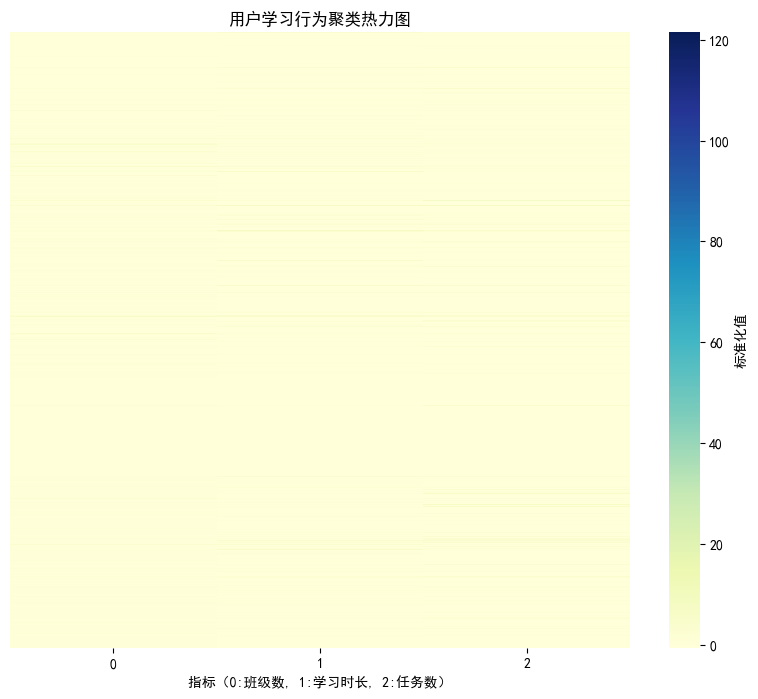

In [61]:
# 选择关键字段并标准化
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(
    user_learn_statistics_total[['joinedClassroomNum', 'learnedHours', 'finishedTaskNum']]
)
plt.figure(figsize=(10,8))
sns.heatmap(
    data_scaled,
    cmap='YlGnBu',
    yticklabels=False,
    cbar_kws={'label': '标准化值'}
)
plt.title('用户学习行为聚类热力图')
plt.xlabel('指标（0:班级数, 1:学习时长, 2:任务数）')
plt.show()

3. 学习行为规律

3.1 按周统计学习事件（折线图）


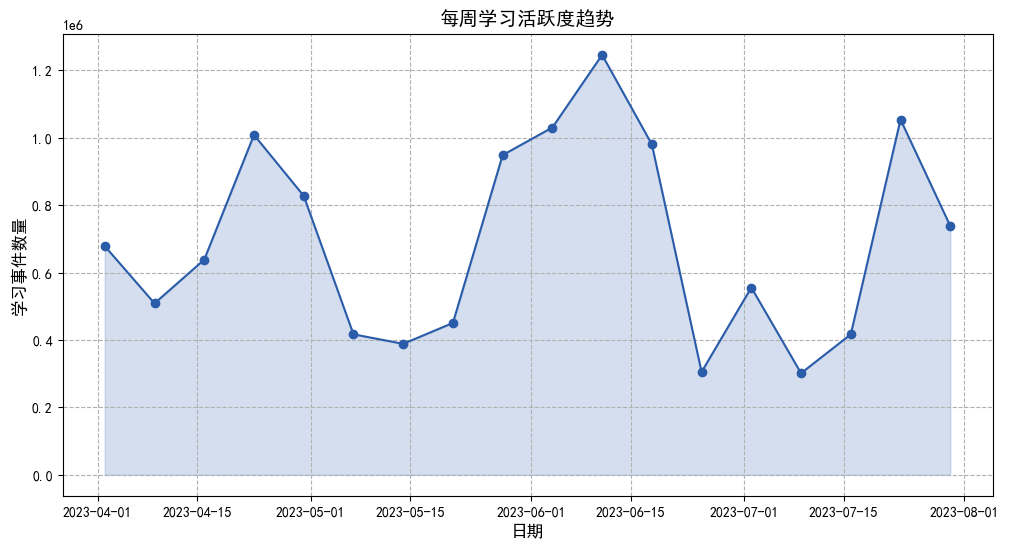

In [23]:
activity_learn_log['createdTime'] = pd.to_datetime(activity_learn_log['createdTime'], unit='s')
weekly_activity = activity_learn_log.resample('W', on='createdTime')['id'].count()
plt.figure(figsize=(12,6))
plt.plot(weekly_activity.index, weekly_activity.values, marker='o', color='#2A5CAA')
plt.fill_between(weekly_activity.index, weekly_activity.values, alpha=0.2, color='#2A5CAA')
plt.title('每周学习活跃度趋势', fontsize=14)
plt.xlabel('日期', fontsize=12)
plt.ylabel('学习事件数量', fontsize=12)
plt.grid(linestyle='--')
plt.show()


可以看到，4月下旬、6月中旬和7月下旬完成任务量较多，可见这三个时间节点是比较忙碌的。推测4月和6月可能是因为期中、期末考试复习压力比较大，7月下旬可能是因为新学期刚开学，学生的动力比较足。也有可能是暑假期间的课余时间比较充裕，学生们都在学习新知识。

3.2 日历热力图（Pyecharts）


In [117]:
daily_activity = activity_learn_log.resample('D', on='createdTime')['id'].count().reset_index()
daily_activity.columns = ['date', 'count']

calendar = (
    Calendar(init_opts=opts.InitOpts(width='1000px'))
    .add(
        series_name='学习事件',
        yaxis_data=[[str(row['date'].date()), row['count']] for _, row in daily_activity.iterrows()],
        calendar_opts=opts.CalendarOpts(range_=['2023-01-01', '2023-12-31'])
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title='2023年每日学习活跃度'),
        visualmap_opts=opts.VisualMapOpts(max_=200, orient='horizontal', pos_top='30px')
    )
)
calendar.render_notebook()

4. 考试成绩影响因素分析


In [63]:
# 合并数据
merged_scores = pd.merge(
    testpaper_result,
    user_learn_statistics_total,
    on='userId',
    how='inner'
)


4.1 三维散点图（Plotly）


In [67]:
fig = px.scatter_3d(
    merged_scores.sample(500),  # 抽样防止性能问题
    x='finishedTaskNum',
    y='learnedHours',
    z='score',
    color='joinedClassroomNum',
    labels={'finishedTaskNum':'完成任务数', 'learnedHours':'学习时长(小时)', 'score':'考试成绩'},
    title='多维度成绩影响因素分析',
    opacity=0.7
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()


4.2 回归分析矩阵图（Seaborn）


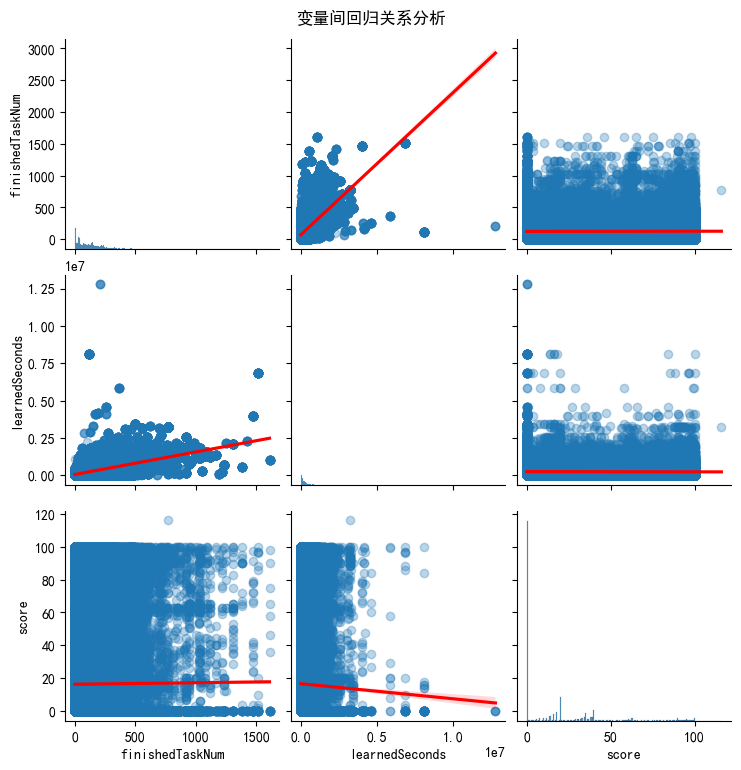

In [ ]:
sns.pairplot(
    merged_scores[['finishedTaskNum', 'learnedSeconds', 'score']],
    kind='reg',
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.3}}
)
plt.suptitle('变量间回归关系分析', y=1.02)
plt.show()

5.班级课程关联分析

5.1 桑基图（班级-课程关联）


In [119]:
# 构造节点与链接数据
nodes = list(set(classroom_courses['classroomId'].astype(str).unique())) + \
        list(set(classroom_courses['courseId'].astype(str).unique()))
nodes = [{'name': node} for node in nodes]

links = []
for _, row in classroom_courses.iterrows():
    links.append({
        'source': str(row['classroomId']),
        'target': str(row['courseId']),
        'value': 1
    })

sankey = (
    Sankey()
    .add(
        series_name="",
        nodes=nodes,
        links=links,
        linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.5),
        label_opts=opts.LabelOpts(position="right")
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="班级与课程关联关系"))
)
sankey.render_notebook()


流失预警

In [120]:
# 6.1 流失漏斗图（Plotly）
exit_data = user_learn_statistics_total[['joinedClassroomNum', 'exitClassroomNum']].mean().reset_index()
exit_data.columns = ['stage', 'count']
exit_data['stage'] = ['加入班级', '退出班级']

fig = px.funnel(
    exit_data,
    x='count',
    y='stage',
    title='用户流失漏斗分析',
    labels={'count':'平均数量', 'stage':'阶段'}
)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

7. 设备使用差异分析

In [29]:
# 行为太多太细，可视化很难看，映射到大类
log["action"].unique()

array(['login_success', 'inflow', 'join_classroom', 'add_student',
       'download', 'avatar-changed', 'update', 'create', 'sms_bind',
       'sms_login', 'login_fail', 'sms_forget_password',
       'password-changed', 'sms_registration', 'add_task',
       'create_lesson', 'regist_device', 'nickname_change',
       'update_course', 'join_course', 'remove_student', 'change_role',
       'add', 'update_settings._app_last_check', 'delete_material',
       'delete', 'verifiedMobile-changed', 'user_logout', 'delete_lesson',
       'add_course', 'unlock_course', 'delete_course',
       'refresh_learning_progress', 'add_testpaper', 'password-reset',
       'create_course', 'sync_when_task_update', 'user_login', 'unbind',
       'close', 'add_question', 'delete_question',
       'sync_when_task_create', 'close_course', 'publish',
       'update_picture', 'email-changed', 'delete_testpaper',
       'delete_chapter', 'update_task', 'create_chapter', 'recommend',
       'cancel_recommend', 'pub

In [30]:
action_category_map = {
    # 用户认证与安全
    'login_success': '用户认证与安全',
    'user_login': '用户认证与安全',
    'login_fail': '用户认证与安全',
    'user_logout': '用户认证与安全',
    'sms_login': '用户认证与安全',
    'sms_bind': '用户认证与安全',
    'sms_forget_password': '用户认证与安全',
    'sms_registration': '用户认证与安全',
    'password-changed': '用户认证与安全',
    'password-reset': '用户认证与安全',
    'regist_device': '用户认证与安全',
    'verifiedMobile-changed': '用户认证与安全',
    'email-changed': '用户认证与安全',
    'register': '用户认证与安全',

    # 课程与班级管理
    'join_classroom': '课程与班级管理',
    'join_course': '课程与班级管理',
    'create_course': '课程与班级管理',
    'update_course': '课程与班级管理',
    'delete_course': '课程与班级管理',
    'add_task': '课程与班级管理',
    'delete_task': '课程与班级管理',
    'update_task': '课程与班级管理',
    'create_lesson': '课程与班级管理',
    'delete_lesson': '课程与班级管理',
    'create_chapter': '课程与班级管理',
    'delete_chapter': '课程与班级管理',
    'add_testpaper': '课程与班级管理',
    'delete_testpaper': '课程与班级管理',
    'publish_course': '课程与班级管理',
    'close_course': '课程与班级管理',
    'unlock_course': '课程与班级管理',
    'sync_when_task_create': '课程与班级管理',
    'sync_when_task_update': '课程与班级管理',
    'sync_when_task_delete': '课程与班级管理',
    'refresh_learning_progress': '课程与班级管理',
    'clone_course_set': '课程与班级管理',
    'update_teacher': '课程与班级管理',
    'update_head_teacher': '课程与班级管理',
    'task_set_optional': '课程与班级管理',
    'task_unset_optional': '课程与班级管理',
    'lesson_set_optional': '课程与班级管理',
    'lesson_unset_optional': '课程与班级管理',

    # 用户资料与设置
    'avatar-changed': '用户资料与设置',
    'nickname_change': '用户资料与设置',
    'update_picture': '用户资料与设置',
    'update_settings.site': '用户资料与设置',
    'update_settings._app_last_check': '用户资料与设置',
    'update_settings._cloud_search_restore_time': '用户资料与设置',
    'update_settings.newcomer_task': '用户资料与设置',
    'update_settings.security': '用户资料与设置',
    'update_settings.crm_site': '用户资料与设置',
    'update_block': '用户资料与设置',
    'navigation_create': '用户资料与设置',
    'navigation_update': '用户资料与设置',
    'exportCsv': '用户资料与设置',

    # 学习与资源操作
    'download': '学习与资源操作',
    'delete_material': '学习与资源操作',
    'delete_favorite': '学习与资源操作',
    'add_question': '学习与资源操作',
    'delete_question': '学习与资源操作',
    'recommend': '学习与资源操作',
    'cancel_recommend': '学习与资源操作',

    # 成员管理
    'create_thread': '成员管理',
    'new_member': '成员管理',
    'delete_member': '成员管理',
    'update_member': '成员管理',
    'change_role': '成员管理',
    'add_student': '成员管理',
    'remove_student': '成员管理',

    # 系统与通知
    'wechat_notification_error': '系统与通知',
    'send_initial_password': '系统与通知',
    'send_import_user_email': '系统与通知',
    'classroom_callback': '系统与通知',
    'course_callback': '系统与通知',
    'inflow': '系统与通知',
    'moneyCardReceive': '系统与通知',
    'generate_coupon': '系统与通知',
    'receive': '系统与通知',
    'use': '系统与通知',
    'lock': '系统与通知',
    'unbind': '系统与通知',
    'close': '系统与通知',

    # 默认其他
    'unknown': '其他'
}

7.1 设备行为对比（堆叠条形图）


In [ ]:
# 分类映射
log['action_category'] = log['action'].map(action_category_map).fillna('其他')

# 按设备和类别统计事件
device_activity = log.pivot_table(
    index='device',
    columns='action_category',
    values='id',
    aggfunc='count',
    fill_value=0
)

# 选择主要类别（排除"其他"）
main_categories = [
    '用户认证与安全',
    '课程与班级管理',
    '用户资料与设置',
    '学习与资源操作',
    '成员管理',
    '系统与通知'
]
device_activity = device_activity[main_categories]


<Figure size 1200x600 with 0 Axes>

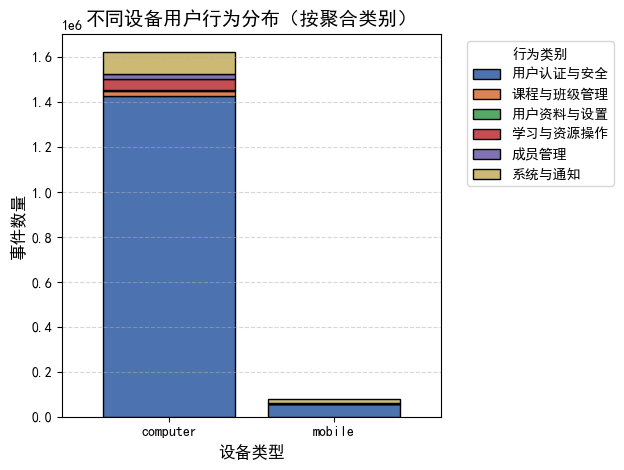

In [32]:
# 绘制堆叠条形图
plt.figure(figsize=(12, 6))
device_activity.plot(
    kind='bar',
    stacked=True,
    color=['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#CCB974'],
    edgecolor='black',
    width=0.8
)

plt.title('不同设备用户行为分布（按聚合类别）', fontsize=14)
plt.xlabel('设备类型', fontsize=12)
plt.ylabel('事件数量', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='行为类别', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

设备间和事件间差异太大，不适合堆叠柱状图，换用双层饼状图


In [42]:
device_total = device_activity.sum(axis=1)  # 各设备总事件量
device_ratio = device_total / device_total.sum()  # 设备占比

# 提取行为类别占比数据
mobile_data = device_activity.loc['mobile']
pc_data = device_activity.loc['computer']

# 定义颜色映射（与之前堆叠图一致）
# palette = sns.color_palette('husl', n_colors=len(main_categories))
# colors = [palette[i] for i in range(len(main_categories))]
colors = ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#CCB974']
categories = device_activity.columns.tolist()

In [34]:
device_ratio

device
computer    0.954098
mobile      0.045902
dtype: float64

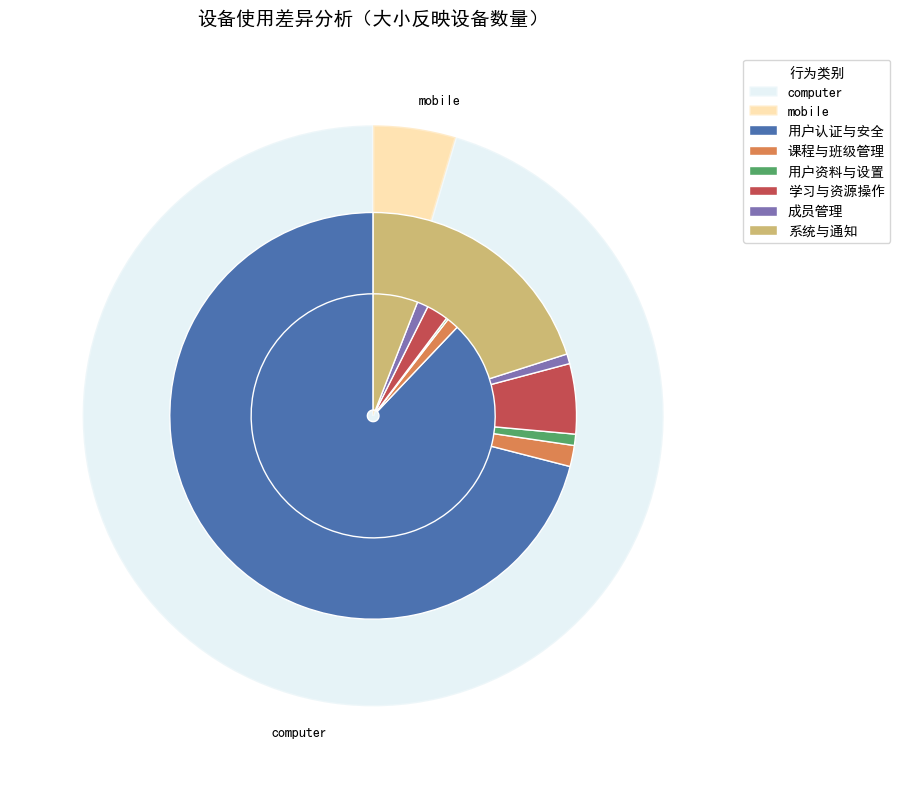

In [49]:
# plt.get_cmap('Set3')
fig, ax = plt.subplots(figsize=(12, 8))

# -------------------------------
# 外层：设备总事件量占比（控制饼图大小）
# -------------------------------
# 根据设备占比和展示效果调整半径
radius_scale = [1.0, 0.6]
wedges_outer, _ = ax.pie(
    device_ratio.values,
    labels=device_ratio.index,
    labeldistance=1.1,
    startangle=90,
    colors=['lightblue', 'orange'],
    radius=max(radius_scale),
    wedgeprops=dict(edgecolor='white', linewidth=2, alpha=0.3),
)

# 调整饼图大小（通过设置半径差异）
# wedges_outer[0].set_radius(radius_scale[0])  # 第一个设备
# wedges_outer[1].set_radius(radius_scale[1])  # 第二个设备

# -------------------------------
# 内层：各设备行为分布（嵌套饼图）
# -------------------------------
# 绘制移动端行为分布（内层）
ax.pie(
    mobile_data,
    labels=None,
    startangle=90,
    colors=colors,
    radius=radius_scale[0] * 0.7,  # 内层半径为外层的70%
    wedgeprops=dict(edgecolor='white', width=0.4)  # 宽度控制环形大小
)

# 绘制PC端行为分布（内层）
ax.pie(
    pc_data,
    labels=None,
    startangle=90,
    colors=colors,
    radius=radius_scale[1] * 0.7,
    wedgeprops=dict(edgecolor='white', width=0.4)
)

# 图例
device_types = device_ratio.index.tolist()
legend = ax.legend(
    # handles=ax.pie([1]*len(categories), colors=colors, radius=0.1)[0],
    labels= device_types + categories,
    title='行为类别',
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

# # 设备总事件量标注
# for i, (device, ratio) in enumerate(device_ratio.items()):
#     ax.text(
#         x=wedges_outer[i].theta2,
#         y=wedges_outer[i].r * 1.1,
#         s=f'{ratio:.1%}',
#         ha='center',
#         va='center',
#         fontsize=10
#     )

plt.title('设备使用差异分析（大小反映设备数量）', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

可以看到，大部分访问量都通过桌面端，只有少部分通过移动端。可能因为在线教育需要较长的使用时间，大屏幕及键鼠操作更方便，对眼睛更好。

大部分事件都是用户认证相关的，尤其是移动端占了近80%。这也符合log表中大多数记录data字段为空的情况。我们可以认为，使用移动端的用户大部分都是登录后用来查看系统消息通知的，而桌面端的用户则更多地用来浏览课程、下载资源、上传文件等。

双端事件占比基本相同，但桌面端的资源下载浏览比例更高。这可能是因为桌面端的用户更熟悉操作，更容易记住密码（浏览器自带功能），也更容易使用浏览器。移动端的用户则更依赖于触屏操作，更容易被动地接受信息。

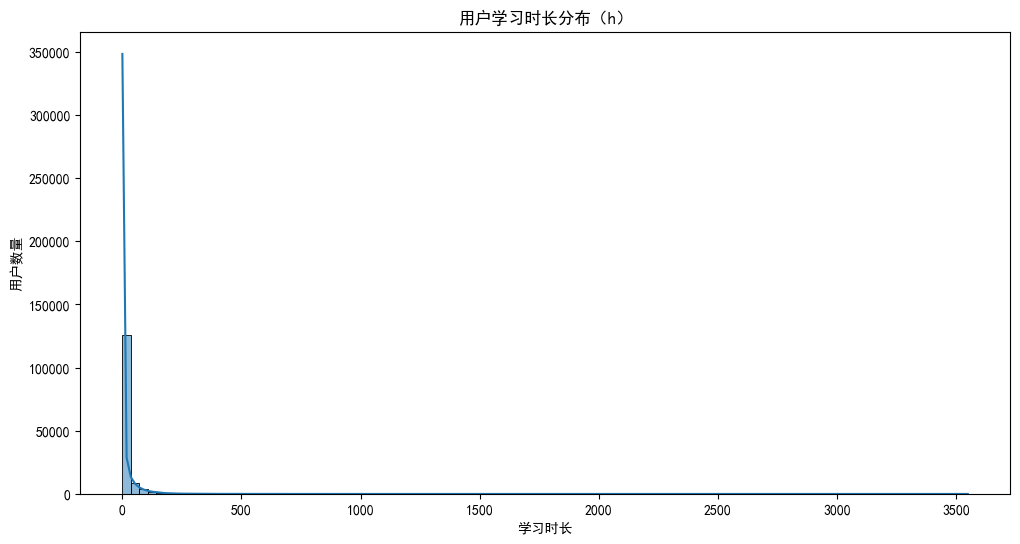

In [36]:
# 统计用户每日学习时长
plt.figure(figsize=(12,6))
sns.histplot(data=user_learn_statistics_total, x=user_learn_statistics_total['learnedSeconds'] / 3600, bins=100, kde=True)
plt.title('用户学习时长分布（h）')
plt.xlabel('学习时长')
plt.ylabel('用户数量')
plt.show()

In [37]:
# # 任务完成率与考试成绩关系（Plotly 散点图）
# # 计算任务完成率与平均分
# merged_data = pd.merge(
#     activity_learn_log,
#     testpaper_result,
#     on=['userId', 'courseId'],
#     how='inner'
# )

# task_completion = merged_data.groupby('userId').agg(
#     tasks_completed=('finishedTaskNum', 'max'),
#     avg_score=('score', 'mean')
# ).reset_index()

# fig = px.scatter(
#     task_completion,
#     x='tasks_completed',
#     y='avg_score',
#     trendline='ols',
#     title='任务完成数量与考试成绩关系'
# )
# fig.show()

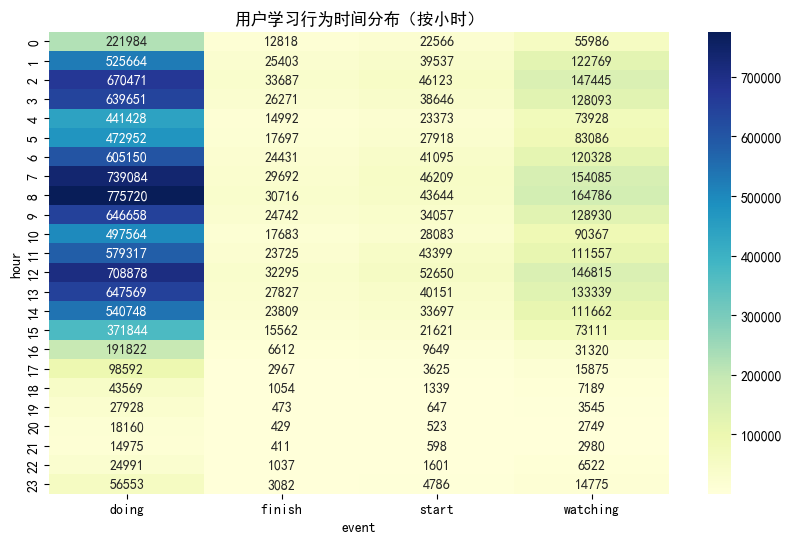

In [38]:
# 转换时间戳为小时
activity_learn_log['hour'] = pd.to_datetime(
    activity_learn_log['createdTime'], unit='s'
).dt.hour

# 绘制热力图
heatmap_data = activity_learn_log.pivot_table(
    index='hour', columns='event', values='id', aggfunc='count', fill_value=0
)
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('用户学习行为时间分布（按小时）')
plt.show()

In [39]:
# from pyecharts.charts import Radar

# # 按班级统计学习指标
# classroom_stats = merged_data.groupby('classroomId').agg(
#     avg_score=('score', 'mean'),
#     avg_learn_time=('learnedSeconds', 'mean'),
#     task_completion_rate=('finishedTaskNum', 'mean')
# ).reset_index()

# # 雷达图参数
# schema = [
#     {'name': '平均成绩', 'max': 100},
#     {'name': '平均学习时长', 'max': 5000},
#     {'name': '任务完成率', 'max': 1}
# ]
# data = [[classroom_stats.iloc[0][['avg_score', 'avg_learn_time', 'task_completion_rate']].tolist()]]

# radar = Radar()
# radar.add_schema(schema)
# radar.add("班级A", data)
# radar.render_notebook()

In [ ]:
# 课程父子关系
from pyecharts.charts import Tree
from pyecharts import options as opts

# 示例：构建课程树（假设 parentCourseId=0 表示根课程）
def build_course_tree(df):
    courses = df[['courseId', 'parentCourseId']].drop_duplicates()
    root_courses = courses[courses['parentCourseId'] == 0]
    tree_data = []
    for _, root in root_courses.iterrows():
        node = {"name": f"课程{root['courseId']}", "children": []}
        children = courses[courses['parentCourseId'] == root['courseId']]
        for _, child in children.iterrows():
            node["children"].append({"name": f"子课程{child['courseId']}"})
        tree_data.append(node)
    return tree_data

# 生成树状图
tree = (
    Tree()
    .add("", build_course_tree(classroom_courses))
    .set_global_opts(title_opts=opts.TitleOpts(title="课程父子关系树状图"))
)
tree.render_notebook()

In [148]:
import networkx as nx

course_links = classroom_courses[['courseId', 'parentCourseId']].drop_duplicates().sort_values(['courseId', 'parentCourseId'])
print(course_links)
print((course_links.groupby('parentCourseId').count()>1).count())


# 构建课程关系图
G = nx.DiGraph()  # 使用有向图表示父子关系

# 添加节点和边
for _, row in course_links.iterrows():
    course_id = row["courseId"]
    parent_id = row["parentCourseId"]
    G.add_node(course_id, label=f"课程{course_id}")
    if parent_id != 0:
        G.add_edge(parent_id, course_id)

      courseId  parentCourseId
0           43              41
1           51               5
2           52               6
3           53               8
4           54               9
...        ...             ...
9419     12789            7944
9420     12790            5903
9421     12791            6826
9422     12792            7364
9423     12793            4239

[9424 rows x 2 columns]
courseId    801
dtype: int64


KeyboardInterrupt: 

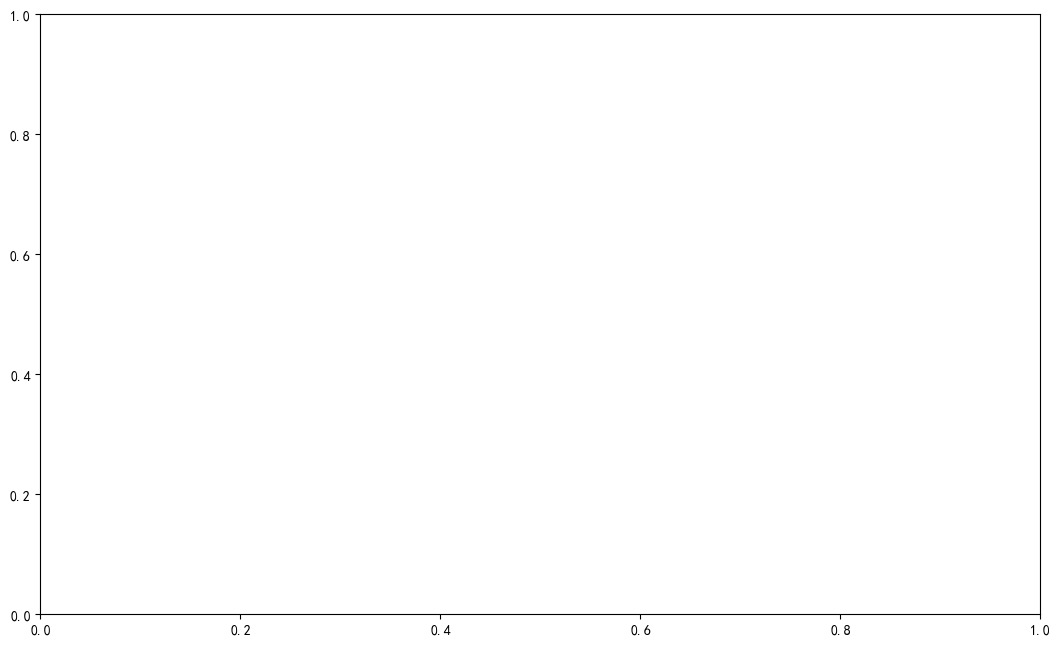

In [150]:
plt.figure(figsize=(10, 6))
nx.draw(
    G,
    # pos,
    with_labels=True,
    labels=nx.get_node_attributes(G, "label"),
    node_size=2000,
    # node_color=node_colors,
    font_size=10,
    font_color="white",
    edge_color="#666666",
    arrows=True,
    arrowsize=20
)

plt.title("课程父子关系层级图", fontsize=14)
plt.show()

In [ ]:
# # 课程和班级共现关系
# from pyecharts.charts import Sankey
# from pyecharts import options as opts

# # 统计班级-课程共现关系（示例）
# classroom_courses_links = classroom_courses.groupby(['classroomId', 'courseId']).size().reset_index(name='count')

# # 生成桑基图节点和链接
# nodes = []
# node_dict = {}
# for course in classroom_courses['courseId'].unique():
#     nodes.append({'name': course})
#     node_dict[course] = len(nodes)-1
# links = []
# for _, row in classroom_courses.iterrows():
#     links.append({
#         'source': node_dict[row['classroomId']],
#         'target': node_dict[row['courseId']],
#         'value': row['count']
#     })

# # 绘制桑基图
# sankey = (
#     Sankey()
#     .add("", nodes, links, linestyle_opt=opts.LineStyleOpts(opacity=0.3, curve=0.5))
#     .set_global_opts(title_opts=opts.TitleOpts(title="课程-班级关联关系"))
# )
# sankey.render_notebook()

KeyError: np.int64(1)